Esempi di SMS:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

=== Report Classificazione ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



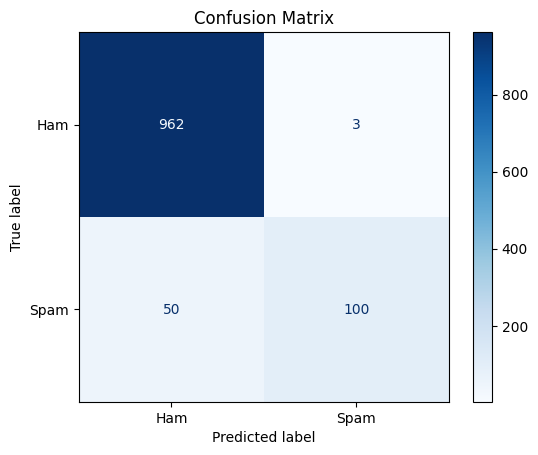


Messaggio: "Win a free iPhone now, click the link!"
Classificato come: SPAM (probabilità spam: 59.62%)

Messaggio: "Ciao, ci vediamo stasera?"
Classificato come: HAM (probabilità spam: 7.90%)

=== Risultati Classificazione da File ===

[1] ""Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/12345 to claim now!"," → SPAM (Probabilità spam: 57.82%)
[2] ""Hey, are we still on for lunch tomorrow?"," → HAM (Probabilità spam: 2.32%)
[3] ""URGENT! Your account has been suspended. Click here to resolve immediately."," → HAM (Probabilità spam: 39.01%)
[4] ""Can you send me the report by 5 PM today?"," → HAM (Probabilità spam: 8.90%)
[5] ""WINNER! Call 555-123-4567 to claim your prize. Limited time only!"," → HAM (Probabilità spam: 45.81%)
[6] ""Are you free this weekend for the party?"," → HAM (Probabilità spam: 25.18%)
[7] ""You have been pre-approved for a $5000 loan. Apply now!"," → HAM (Probabilità spam: 23.45%)
[8] ""Happy birthday! Hope you have a great day!"," →

In [3]:
# === LIBRERIE ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === IMPORT DATASET ===
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # 0 = ham, 1 = spam

print("Esempi di SMS:")
print(df.head())

# === SPLIT TRAIN/TEST ===
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# === VETTORIZZAZIONE TESTI ===
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# === MODELLAZIONE (Logistic Regression) ===
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# === PREDIZIONI ===
y_pred = model.predict(X_test_vec)

# === METRICHE ===
print("\n=== Report Classificazione ===")
print(classification_report(y_test, y_pred))

# === CONFUSION MATRIX ===
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# === TEST SU NUOVO SMS ===
def test_sms(message):
    vect = vectorizer.transform([message])
    pred = model.predict(vect)[0]
    prob = model.predict_proba(vect)[0][1]
    print(f"\nMessaggio: \"{message}\"\nClassificato come: {'SPAM' if pred == 1 else 'HAM'} (probabilità spam: {prob:.2%})")

# === ESEMPIO DI TEST ===
test_sms("Win a free iPhone now, click the link!")
test_sms("Ciao, ci vediamo stasera?")



# === CLASSIFICAZIONE DA FILE ===
def classifica_sms_da_file(percorso_file):
    try:
        with open(percorso_file, "r", encoding="utf-8") as f:
            righe = f.readlines()

        num_spam = 0
        num_ham = 0

        print("\n=== Risultati Classificazione da File ===\n")
        for i, riga in enumerate(righe):
            riga = riga.strip()
            if not riga:
                continue  # salta righe vuote

            vect = vectorizer.transform([riga])
            pred = model.predict(vect)[0]
            prob = model.predict_proba(vect)[0][1]

            label = 'SPAM' if pred == 1 else 'HAM'
            print(f"[{i+1}] \"{riga}\" → {label} (Probabilità spam: {prob:.2%})")

            if pred == 1:
                num_spam += 1
            else:
                num_ham += 1

        # Stampa riepilogo finale
        print("\n=== Riepilogo ===")
        print(f"Totale messaggi: {num_spam + num_ham}")
        print(f"SPAM: {num_spam}")
        print(f"HAM:  {num_ham}")

    except FileNotFoundError:
        print(f"❌ File non trovato: {percorso_file}")


classifica_sms_da_file("messaggi_test.txt")
